In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ydata_profiling
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("vgsales.csv")

# EDA

In [3]:
#ydata_profiling.ProfileReport(df)

In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(16719, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
df.duplicated().sum()

0

<Axes: >

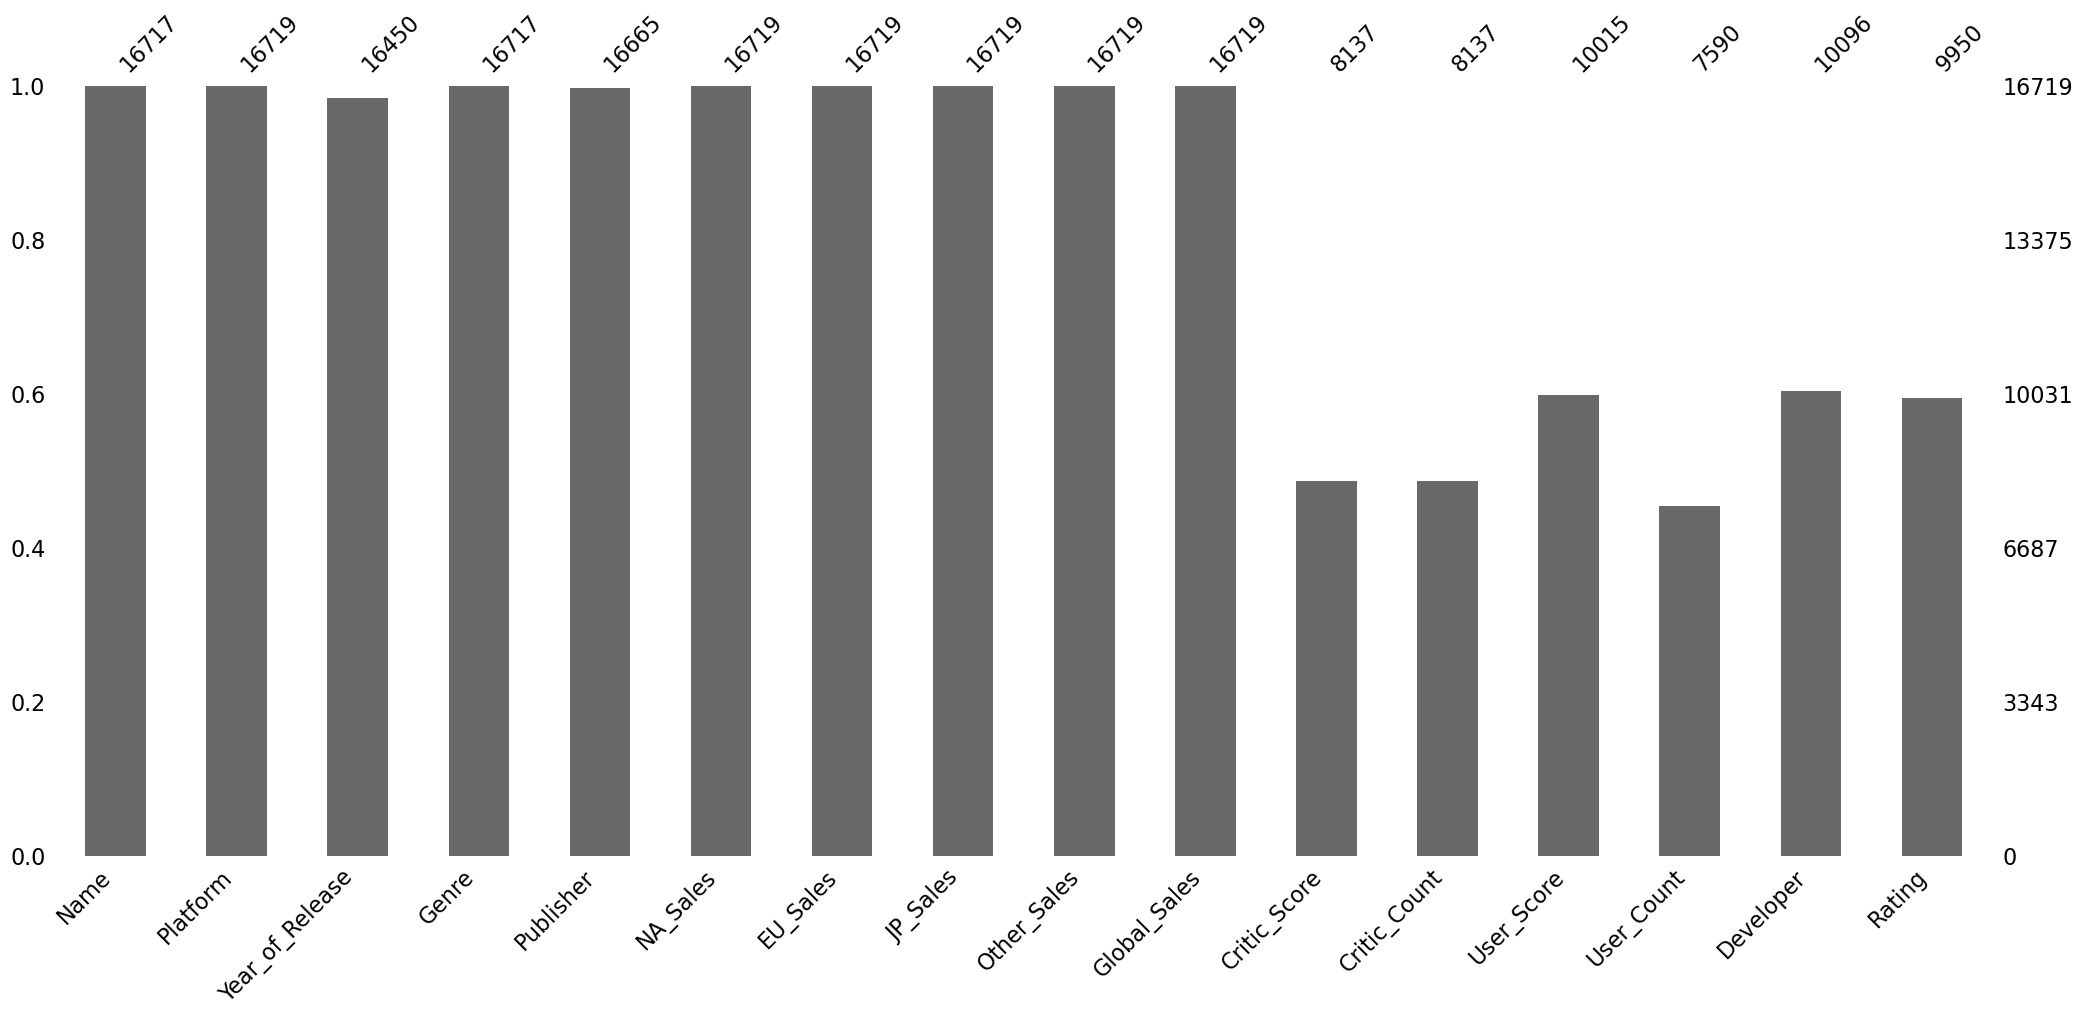

In [8]:
msno.bar(df, n=16719)

In [9]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [10]:
df.describe(include="object")

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16717,16719,16717,16665,10015,10096,9950
unique,11562,31,12,581,96,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,12,2161,3370,1356,2425,204,3991


In the above code there are a number of observations which will need to be addressed before Visulation
* 10 of the features has missing values
* In addition to having some NaN values there are 96 "tbd" values in User_Score which causes this feature to be object as oppose to be a numeric feature that would be needed for many of visualisation you would use for a feature about game scores.
* User_Score is 0-10 while Critic_Score is 0-100 if they both had the same scale it'll be easier to compare them
* Year_of_Release is a float but it would be more ideal for visualisations to be an interger 
* Simularly to Year_of_Release, User_Count, Critic_Count and Critic_Score features are floats when it'll better to be intergers
* The values in the Sales features are in tens when sales are would in reality be millions

In [11]:
df.loc[df["User_Score"]=="tbd"]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
119,Zumba Fitness,Wii,2010.0,Sports,505 Games,3.45,2.59,0.0,0.66,6.71,NaN,NaN,tbd,NaN,"Pipeworks Software, Inc.",E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,Namco Bandai Games,2.08,1.35,0.0,0.54,3.98,61.0,21.0,tbd,NaN,Digital Eclipse,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,Majesco Entertainment,1.51,1.03,0.0,0.27,2.81,NaN,NaN,tbd,NaN,"Majesco Games, Majesco",T
645,uDraw Studio,Wii,2010.0,Misc,THQ,1.65,0.57,0.0,0.20,2.42,71.0,9.0,tbd,NaN,THQ,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.0,0.07,2.39,73.0,4.0,tbd,NaN,Konami Computer Entertainment Hawaii,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16699,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.0,0.00,0.01,67.0,9.0,tbd,NaN,Planet Interactive,E
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.0,0.00,0.01,53.0,4.0,tbd,NaN,Taito Corporation,E
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.0,0.00,0.01,48.0,10.0,tbd,NaN,Interchannel-Holon,E
16708,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.0,0.00,0.01,NaN,NaN,tbd,NaN,Big John Games,E


In [12]:
missing_data=["tbd"]
df=pd.read_csv("vgsales.csv",na_values=missing_data)

In [13]:
df.dropna(subset=["Name","Year_of_Release","Genre","Publisher"],inplace= True)

In [14]:
df.shape

(16416, 16)

Above I have converted the "tbd" values into regular NaN values. For the "Name","Year_of_Release","Genre","Publisher" feature it has a small amount of Missing values, which the largest of these, "Year_of_Release", only being 1.6% of the overall observations. Given this I've decised to drop these obersations. This reduces the total observations to 16,416 which is a reduction of 1.8% 

In [15]:
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         8955
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

<Axes: xlabel='Critic_Score', ylabel='Count'>

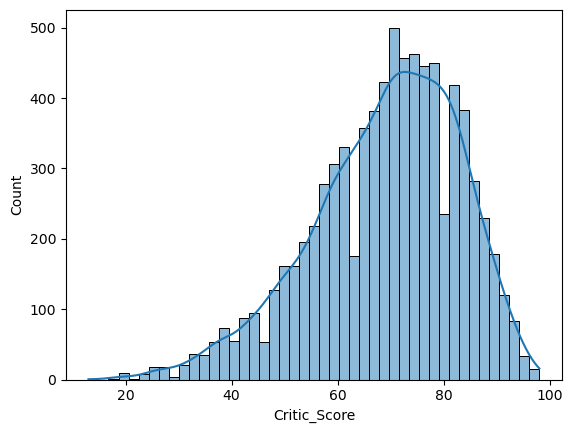

In [16]:
sns.histplot(df,x="Critic_Score", kde=True)

<Axes: xlabel='Critic_Count', ylabel='Count'>

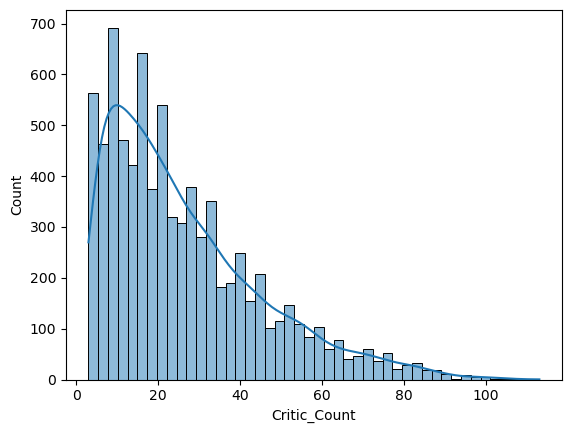

In [17]:
sns.histplot(df,x="Critic_Count", kde=True)

<Axes: xlabel='User_Count', ylabel='Count'>

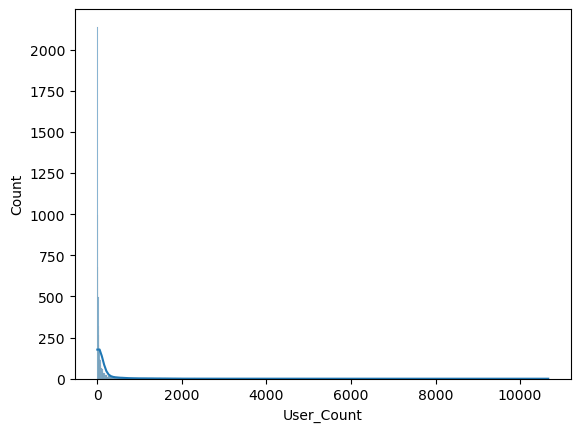

In [18]:
sns.histplot(df,x="User_Count", kde=True)

<Axes: xlabel='User_Score', ylabel='Count'>

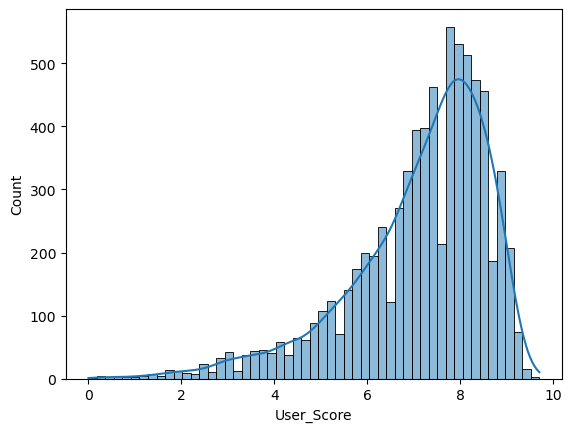

In [19]:
sns.histplot(df,x="User_Score", kde=True)

In [20]:
df["Critic_Count"].fillna(df["Critic_Count"].median(), inplace=True)
df["Critic_Score"].fillna(df["Critic_Score"].median(), inplace=True)
df["User_Count"].fillna(df["User_Count"].median(), inplace=True)
df["User_Score"].fillna(df["User_Score"].median(), inplace=True)

In [21]:
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6512
Rating             6649
dtype: int64

The above 4 graphs show that "Critic_Score", "Critic_Count", "User_Score" and "User_Count" are skewed. For data that is skewed it is more suitable to replace the Null values with the median over the mean, which I have done above. Ther remaining Features with NaN values are "Developer" and "Rating", given these are both Categorical Data. It would be losing too much data to just simply drop them. I could convert them into them own category,  but were I to do that, when I did begin to visulise the data it would only noise in the graphs, with a limited insight that we would gain from seeing graph with 6,000 plus missings Values. I've therefore decided to leaves these NaN values alone, and should there be any work carried out on these features, i'll then exclude the NaN vlaues from those specific Visulation.   

In [22]:
df["User_Score"]=df["User_Score"]*10
df["NA_Sales"]=df["NA_Sales"]*1000000
df["EU_Sales"]=df["EU_Sales"]*1000000
df["JP_Sales"]=df["JP_Sales"]*1000000
df["Global_Sales"]=df["Global_Sales"]*1000000

In [23]:
df['Year_of_Release']=df['Year_of_Release'].astype(int)
df['Critic_Count']=df['Critic_Count'].astype(int)
df['Critic_Score']=df['Critic_Score'].astype(int)
df['User_Count']=df['User_Count'].astype(int)
df["User_Score"]=df["User_Score"].astype(int)

The final part of the EDA is some Feature Engineering to make some feature more appropiate for the visulation. I've have:
* Multiplied the User_Score by 10 to bring it to a rating scale of 0-100 which is in line with the Critic_Score
* Multiplied the Sales features by 1 million to show the actual sales amounts
* Converted the Year_of_Release, Critic_Count, Critic_Score, User_Count and User_Score feature into intergers so they can be more visually appealing on the below graphs

# Question 1 Part 1
What are the top 5 games by global sales?  

In [24]:
dfQ1_1=df.nlargest(5,"Global_Sales",keep="all")

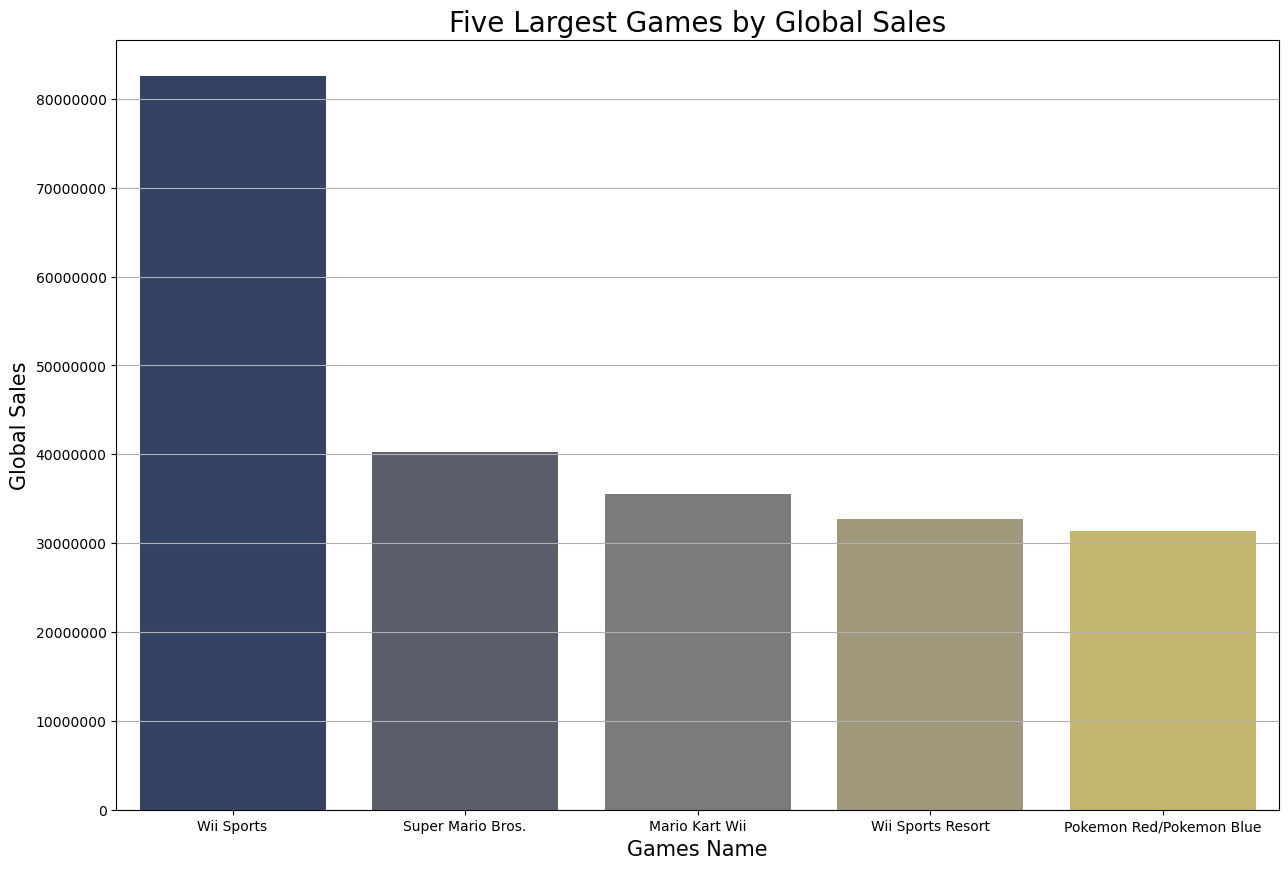

In [46]:
plt.figure(figsize=(15,10))
sns.barplot(dfQ1_1,x="Name",y="Global_Sales",palette="cividis")
plt.title("Five Largest Games by Global Sales",fontsize=20)
plt.xlabel("Games Name",fontsize=15)
plt.ylabel("Global Sales",fontsize=15)
plt.ticklabel_format(style="plain", axis="y")
plt.grid(axis="y");

For this Visualtion I started with creating a new dataframe. This dataframe is formed using the panada function, .nlargest using "Global Sales" as the column parameter. 

For the graph itself I used a Bar chart given that "Games names" is a nominal data. I used the matplotlib code: plt.ticklabel_format as the Y axis defaulted to a scienfic number. Given that the the X axis is quite long I've used the matplotlib code: plt.grid(axis="y"), so the end user can more easily read the Global Sales of the games on the far right of the X axis. I've used the colour pallette "cividis" as it is a friendly colour palette for people who have red-green colour blindness, which is the most common colour blindness (Fernández-Barral,2020). 

## Question 1 Part 2

In [26]:
dfQ1_2=df[(df["Year_of_Release"]>=2010) & (df["Year_of_Release"]<=2014)]

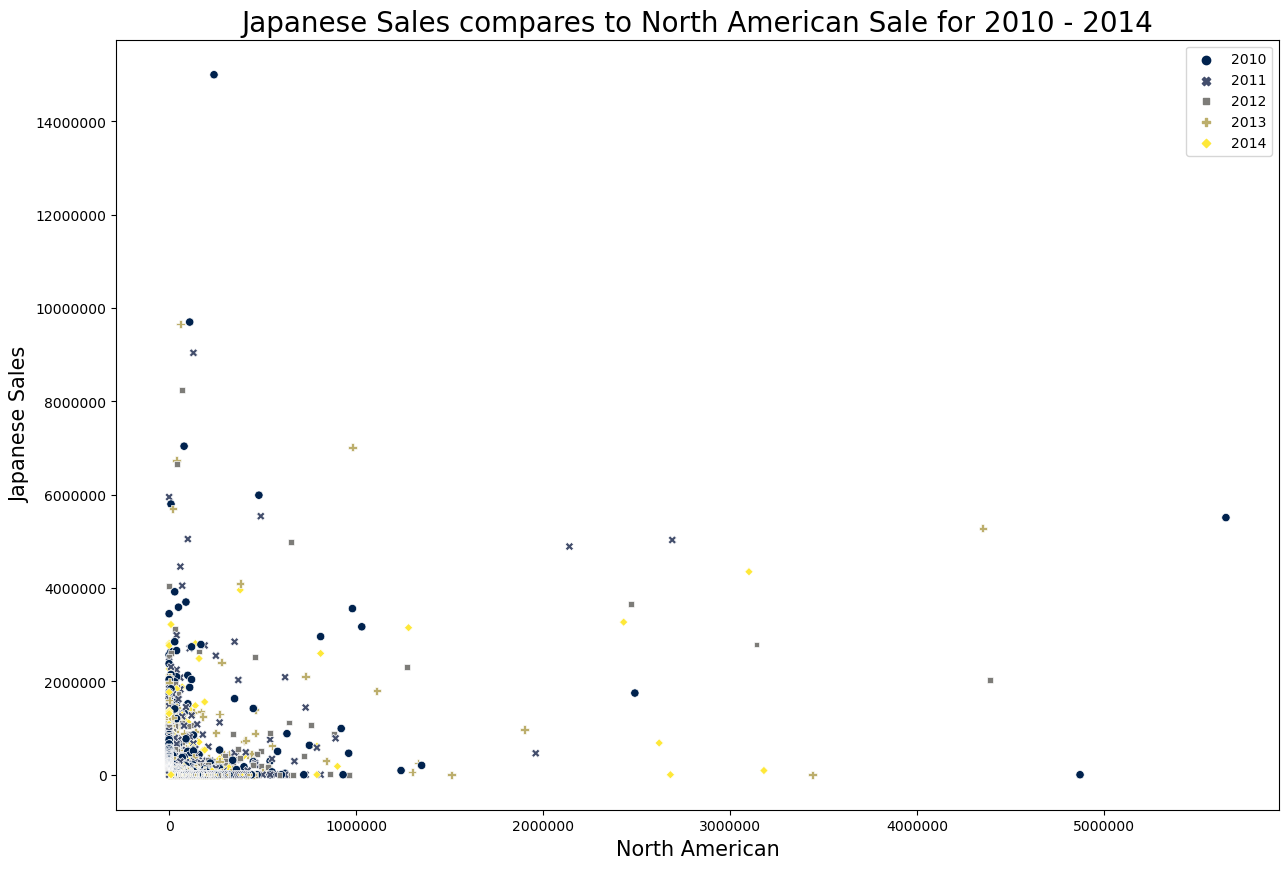

In [49]:
plt.figure(figsize=(15,10))
sns.scatterplot(dfQ1_2,x="JP_Sales",y="NA_Sales",hue="Year_of_Release", palette="cividis", style="Year_of_Release")
plt.title("Japanese Sales compares to North American Sale for 2010 - 2014",fontsize=20)
plt.xlabel("North American",fontsize=15)
plt.ylabel("Japanese Sales",fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.ticklabel_format(style="plain");

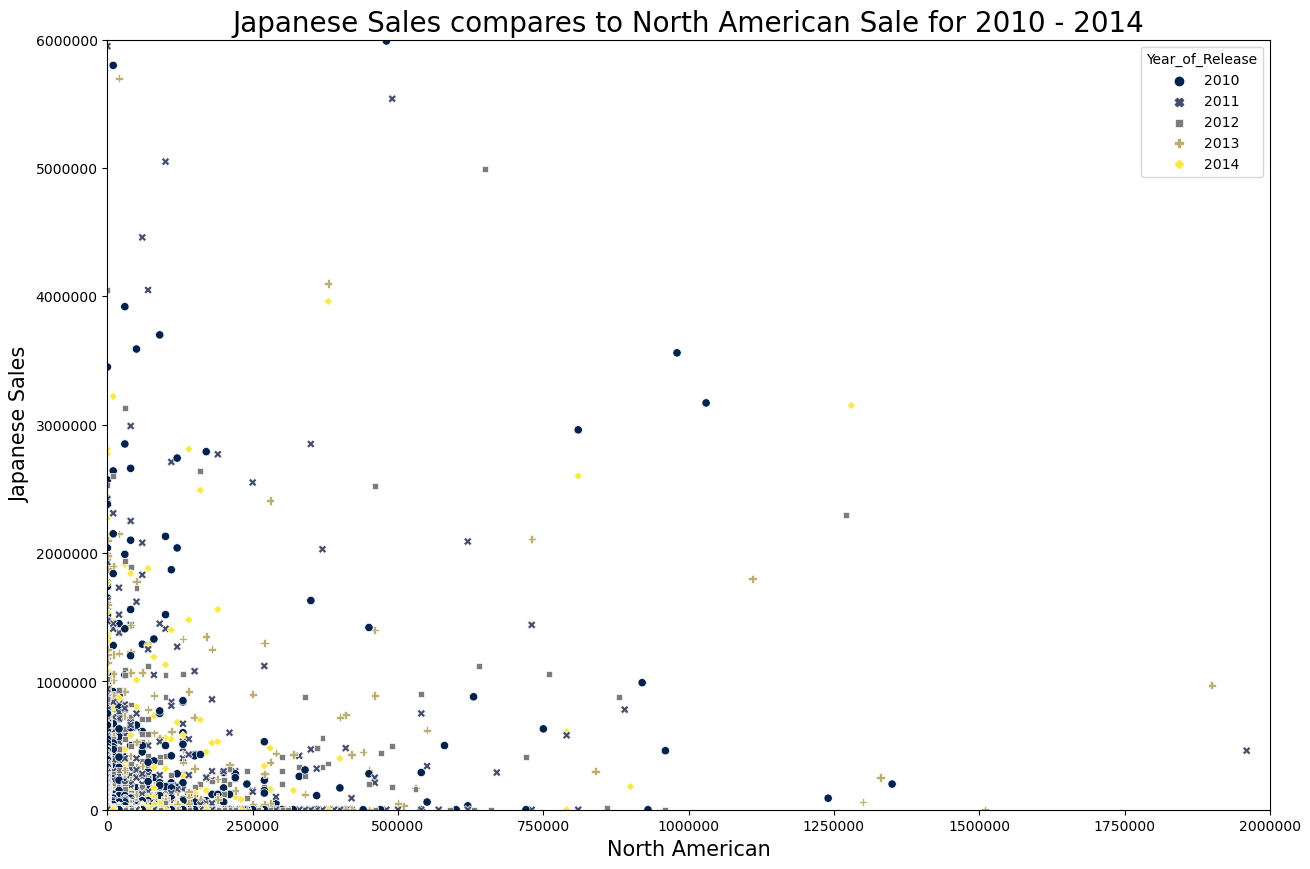

In [50]:
plt.figure(figsize=(15,10))
sns.scatterplot(dfQ1_2,x="JP_Sales",y="NA_Sales",hue="Year_of_Release", palette="cividis", style="Year_of_Release")
plt.title("Japanese Sales compares to North American Sale for 2010 - 2014",fontsize=20)
plt.xlabel("North American",fontsize=15)
plt.ylabel("Japanese Sales",fontsize=15)
plt.xlim(0,2000000)
plt.ylim(0,6000000)
plt.ticklabel_format(style="plain");

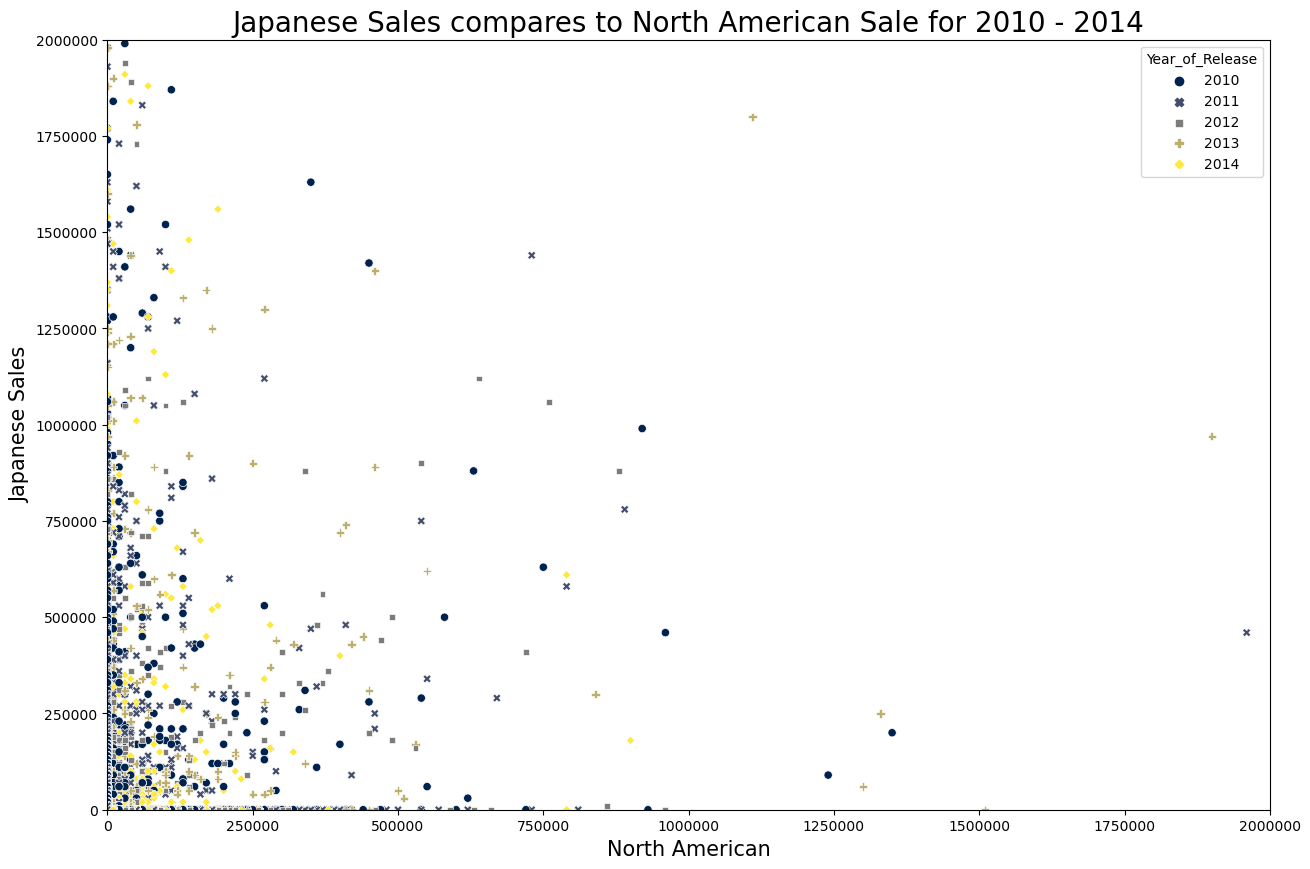

In [51]:
plt.figure(figsize=(15,10))
sns.scatterplot(dfQ1_2,x="JP_Sales",y="NA_Sales",hue="Year_of_Release",palette="cividis", style="Year_of_Release")
plt.title("Japanese Sales compares to North American Sale for 2010 - 2014",fontsize=20)
plt.xlabel("North American",fontsize=15)
plt.ylabel("Japanese Sales",fontsize=15)
plt.xlim(0,2000000)
plt.ylim(0,2000000)
plt.ticklabel_format(style="plain");

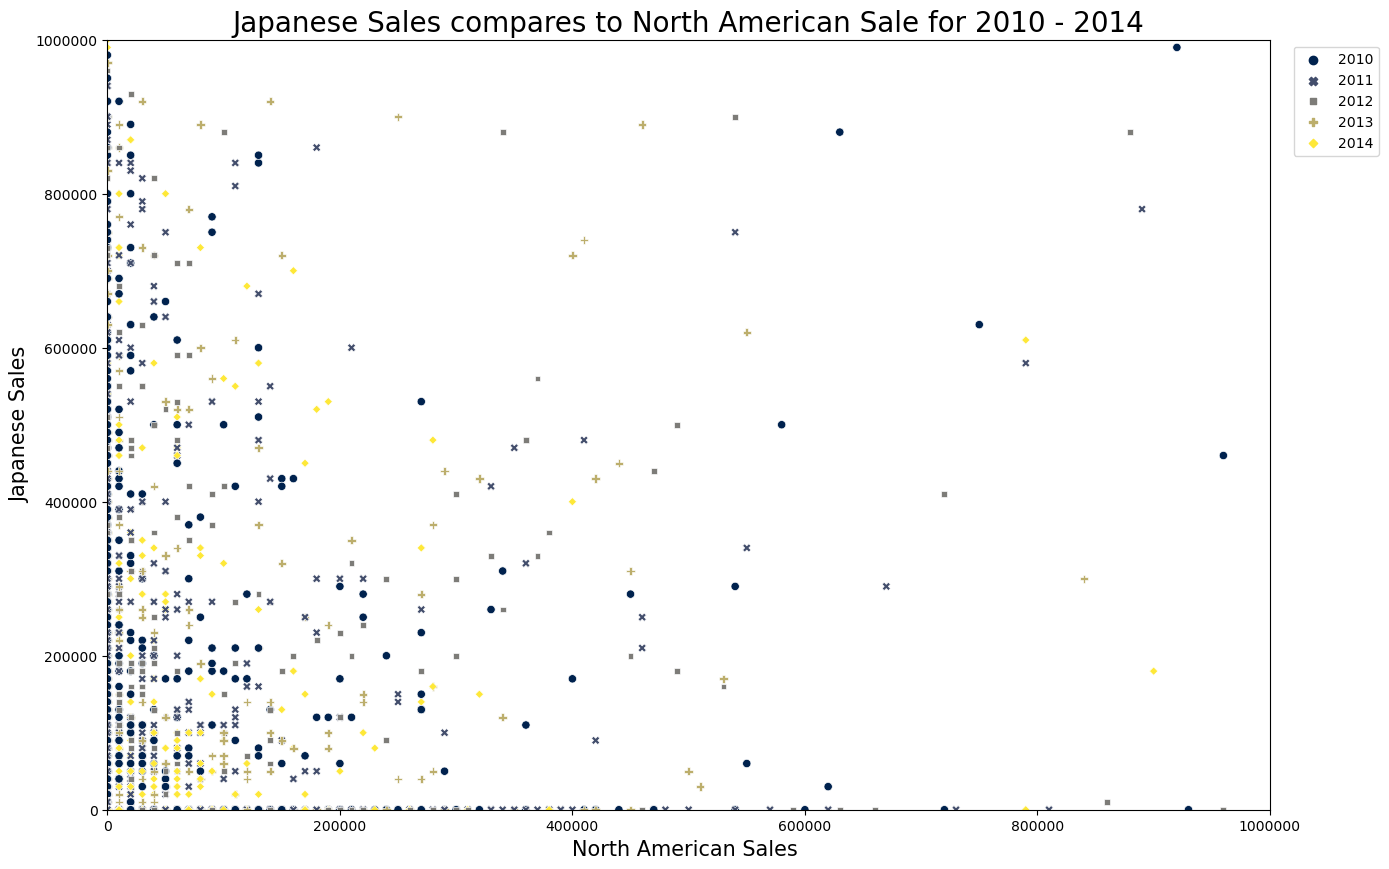

In [52]:
plt.figure(figsize=(15,10))
sns.scatterplot(dfQ1_2,x="JP_Sales",y="NA_Sales",hue="Year_of_Release",palette="cividis", style="Year_of_Release")
plt.title("Japanese Sales compares to North American Sale for 2010 - 2014",fontsize=20)
plt.xlabel("North American Sales ",fontsize=15)
plt.ylabel("Japanese Sales",fontsize=15)
plt.xlim(0,1000000)
plt.ylim(0,1000000)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.ticklabel_format(style="plain");

# Question 1 Part 3

In [31]:
df["Genre"].value_counts()

Action          3307
Sports          2306
Misc            1697
Role-Playing    1483
Shooter         1296
Adventure       1291
Racing          1225
Platform         878
Simulation       855
Fighting         837
Strategy         672
Puzzle           569
Name: Genre, dtype: int64

In [32]:
Action=df[df["Genre"]=="Action"]
Sports=df[df["Genre"]=="Sports"]
Role_Playing=df[df["Genre"]=="Role-Playing"]
Shooter=df[df["Genre"]=="Shooter"]

In [33]:
dfQ1_3=pd.concat([Action,Sports,Role_Playing,Shooter])
dfQ1_3=pd.DataFrame(dfQ1_3)

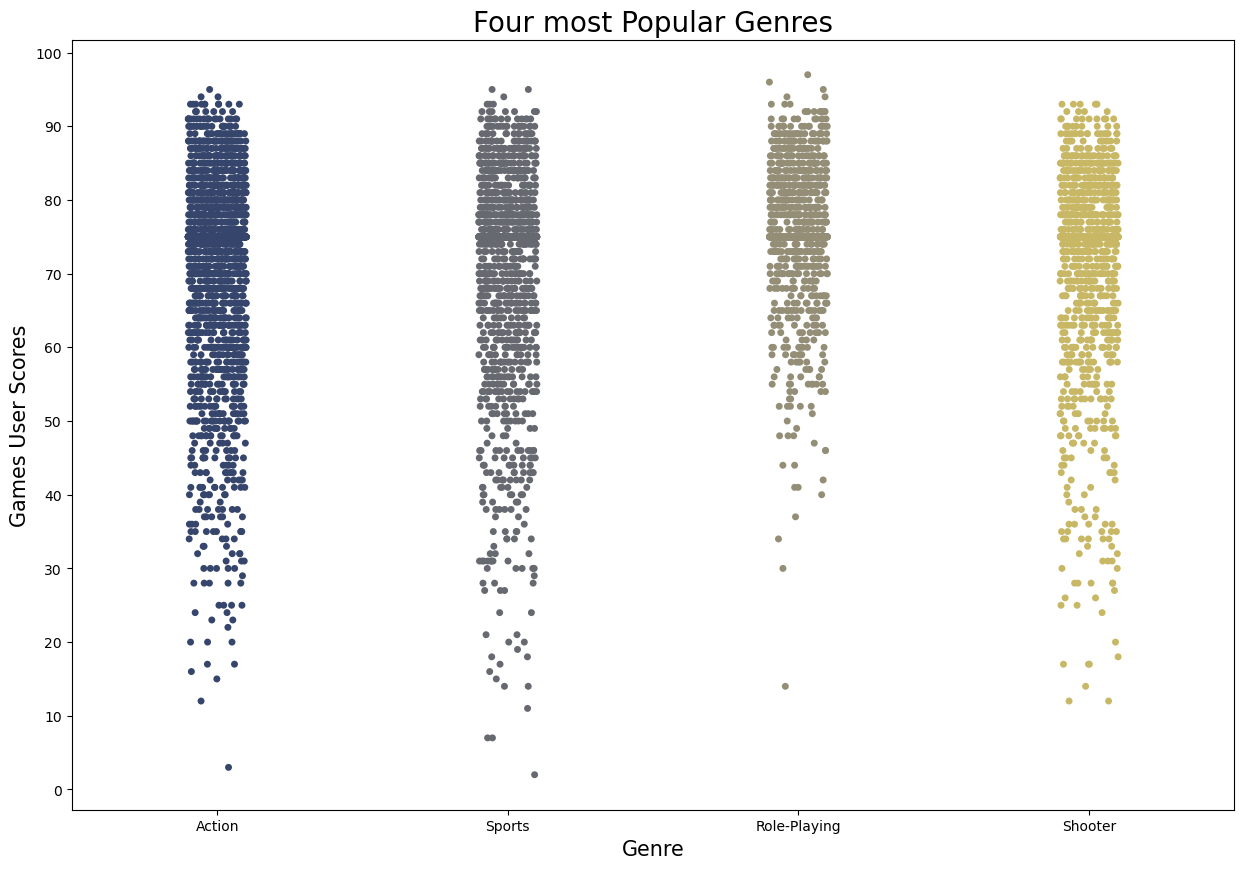

In [53]:
plt.figure(figsize=(15,10))
sns.stripplot(dfQ1_3,x="Genre", y="User_Score", palette="cividis")
plt.title("Four most Popular Genres",fontsize=20)
plt.xlabel("Genre",fontsize=15)
plt.ylabel("Games User Scores",fontsize=15)
plt.yticks(np.arange(0,110,10));

# Question 1 Part 4

In [35]:
dfQ1_4=df.groupby("Year_of_Release")["EU_Sales"].mean()
dfQ1_4=pd.DataFrame(dfQ1_4)
dfQ1_4.reset_index(inplace=True)

In [36]:
col=["red" if year<2006 else "blue" for year in dfQ1_4["Year_of_Release"]]

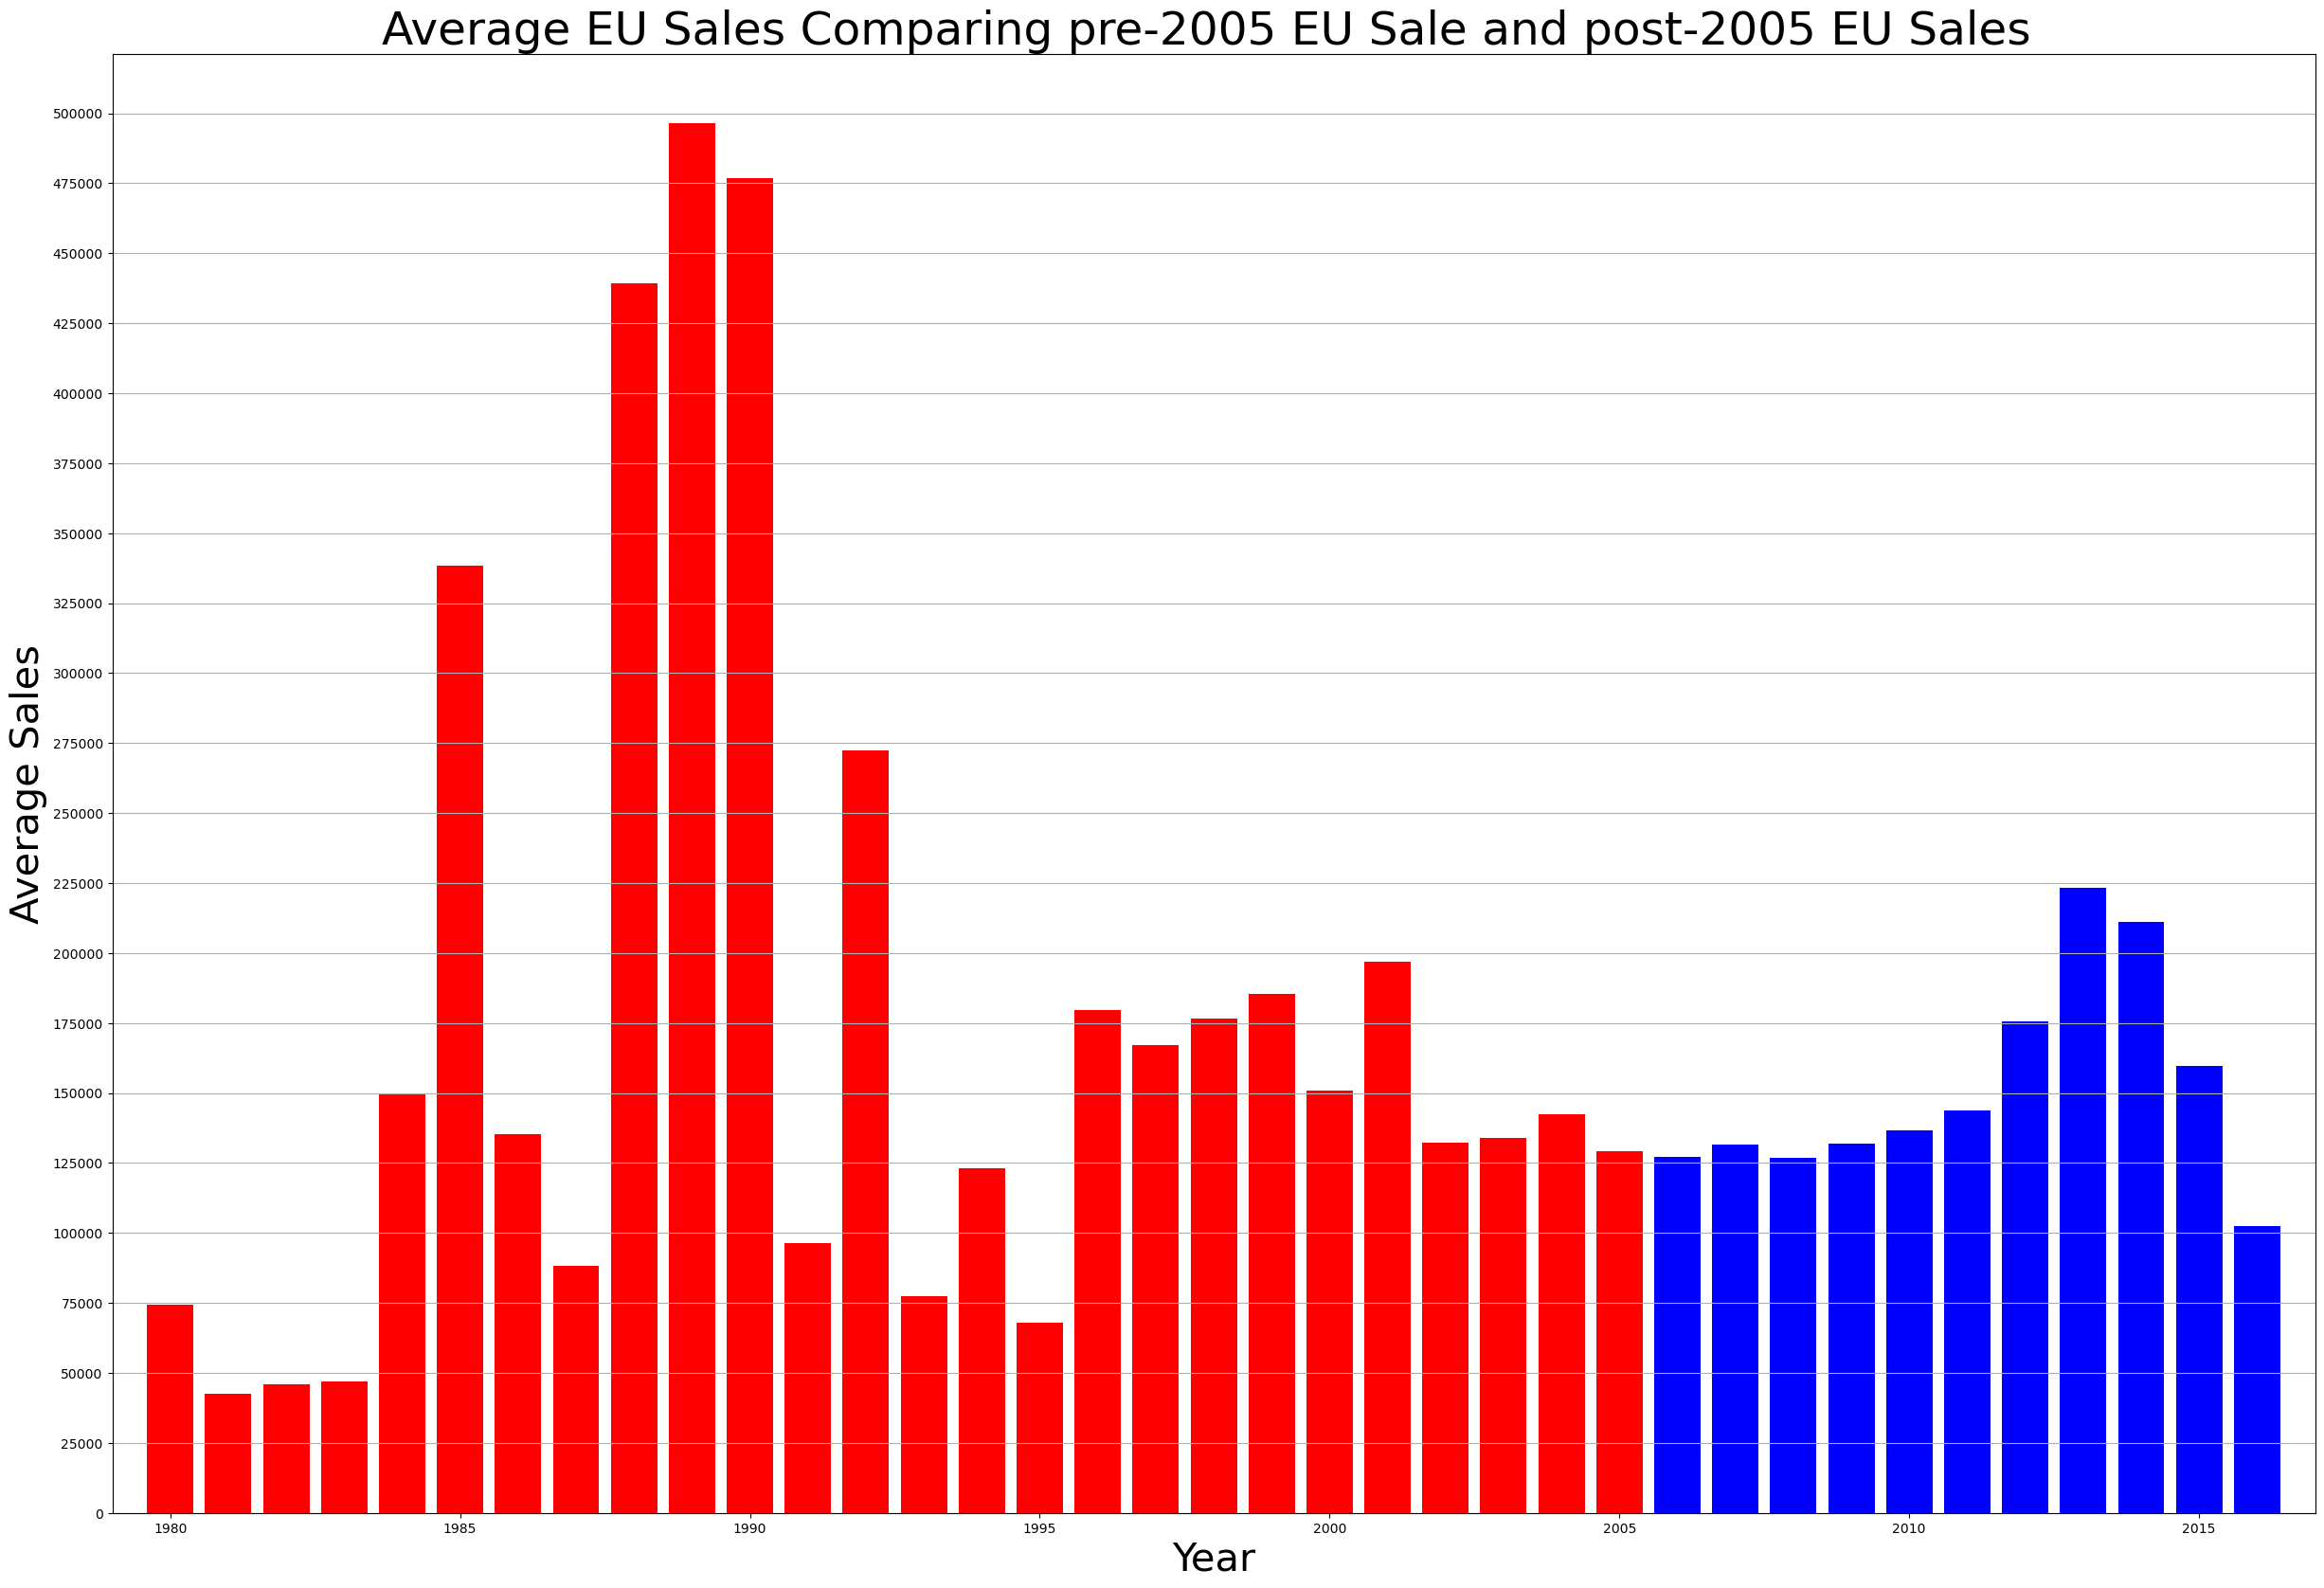

In [37]:
plt.figure(figsize=(30,20))
plt.bar(dfQ1_4["Year_of_Release"],dfQ1_4["EU_Sales"],color=col)
plt.title("Average EU Sales Comparing pre-2005 EU Sale and post-2005 EU Sales ",fontsize=35)
plt.xlabel("Year",fontsize=30)
plt.ylabel("Average Sales",fontsize=30)
plt.xlim(1979,2017)
plt.yticks(np.arange(0,520000,25000))
plt.grid(axis="y");

# Question 1 Part 5

In [38]:
dfQ1_5 = pd.DataFrame({"Number of Games":df["Developer"].value_counts()})
dfQ1_5.reset_index(inplace=True)
dfQ1_5=dfQ1_5.nlargest(3,"Number of Games",keep="all")
dfQ1_5

,index,Number of Games
0,Ubisoft,201
1,EA Sports,169
2,EA Canada,164


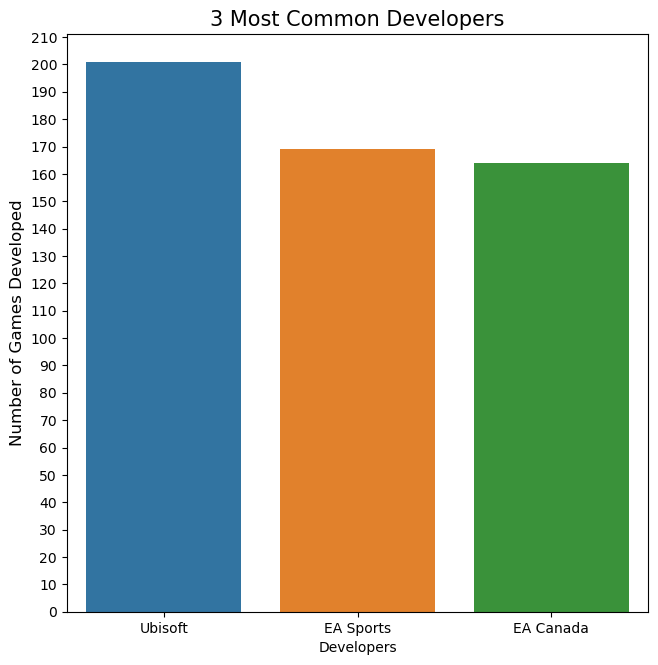

In [39]:
plt.figure(figsize=(7.5,7.5))
sns.barplot(dfQ1_5,x="index", y="Number of Games") 
plt.title("3 Most Common Developers",fontsize=15)
plt.xlabel("Developers",fontsize=10) 
plt.ylabel("Number of Games Developed",fontsize=12)
plt.yticks(np.arange(0,220,10));

# Question 2

In [40]:
df["Platform"].value_counts()

PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       952
XB       803
GBA      786
GC       542
3DS      512
PSV      429
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [41]:
PS2=df[df["Platform"]=="PS2"] 
DS=df[df["Platform"]=="DS"] 
PS3=df[df["Platform"]=="PS3"] 
Wii=df[df["Platform"]=="Wii"]
PSP=df[df["Platform"]=="PSP"]

In [42]:
dfQ2=pd.concat([PS2,DS,PS3,Wii,PSP]) 
dfQ2=pd.DataFrame(dfQ2)
dfQ2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9430000.0,400000.0,410000.0,10.57,20810000.0,95,80,90,1588,Rockstar North,M
24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8410000.0,5490000.0,470000.0,1.78,16150000.0,95,62,87,730,Rockstar North,M
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6850000.0,5090000.0,1870000.0,1.16,14980000.0,95,54,84,314,Polyphony Digital,E
38,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6990000.0,4510000.0,300000.0,1.30,13100000.0,97,56,85,664,DMA Design,M
48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3010000.0,10000.0,1100000.0,7.53,11660000.0,89,74,85,272,Polyphony Digital,E


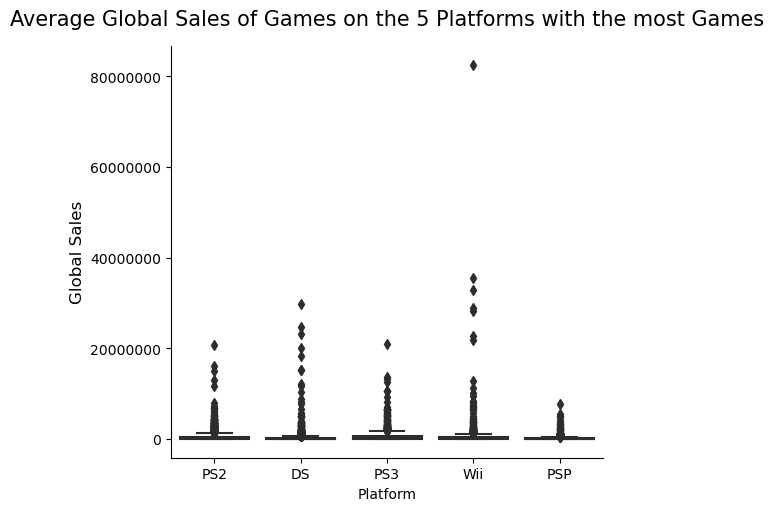

In [55]:
sns.catplot(x="Platform", y="Global_Sales", kind = "box", data=dfQ2, palette="cividis")
plt.title("Average Global Sales of Games on the 5 Platforms with the most Games",fontsize=15, pad=15)
plt.xlabel("Platform",fontsize=10) 
plt.ylabel("Global Sales",fontsize=12)
plt.ticklabel_format(style="plain",axis="y");

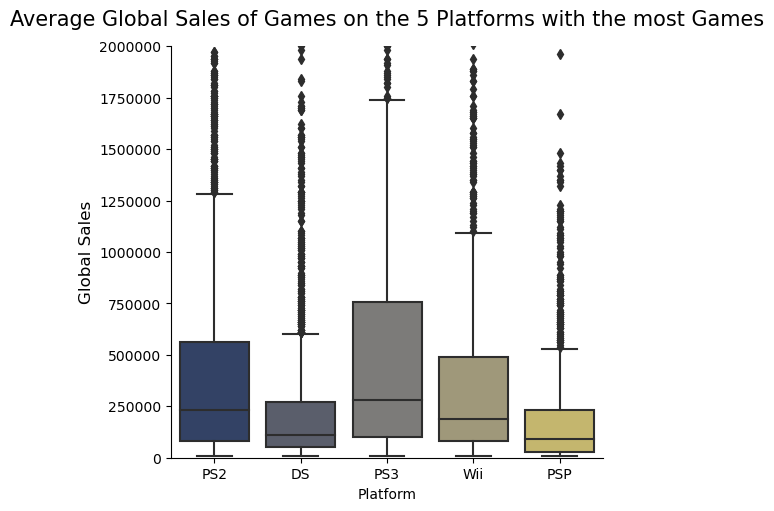

In [57]:
sns.catplot(x="Platform", y="Global_Sales", kind = "box", data=dfQ2,palette="cividis")
plt.title("Average Global Sales of Games on the 5 Platforms with the most Games",fontsize=15, pad=15)
plt.xlabel("Platform",fontsize=10) 
plt.ylabel("Global Sales",fontsize=12)
plt.ylim(0,2000000)
plt.ticklabel_format(style="plain",axis="y");